In [16]:
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

scikit-learn version: 1.5.2


In [18]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [19]:
X = df.drop(['label'], axis=1)
Y = df['label']

In [20]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(Y)

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
pipeline = make_pipeline(
    preprocessing.StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [23]:
accuracy = pipeline.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9931818181818182


In [24]:
joblib.dump(pipeline, 'best_random_forest_model.pkl')
print("Random Forest pipeline saved successfully.")

Random Forest pipeline saved successfully.


In [25]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

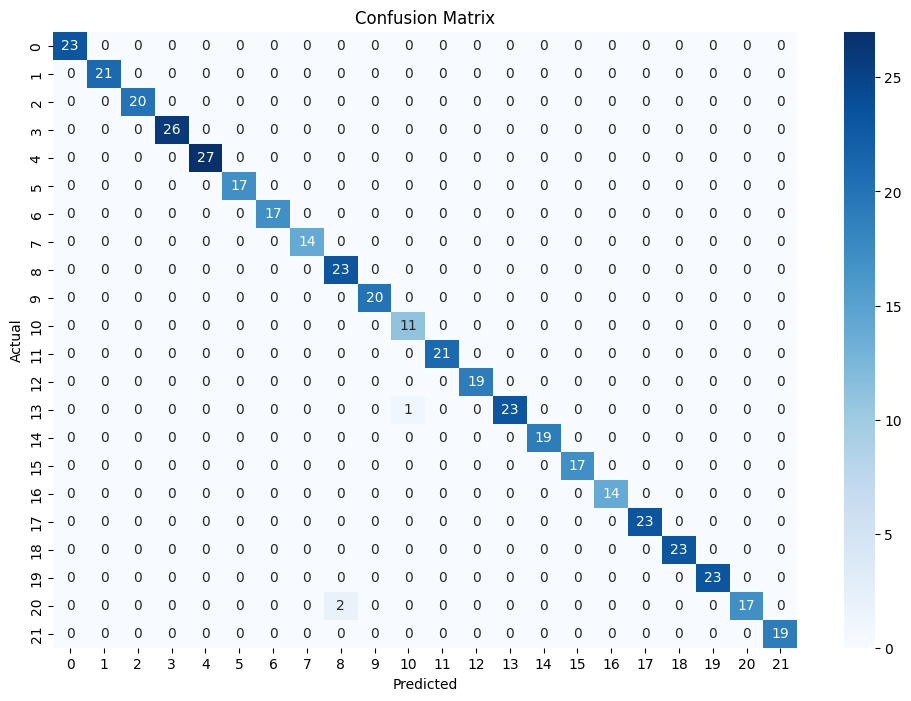

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Label Encoder saved successfully.")

Label Encoder saved successfully.
